In [174]:
from yolov5.onnx_detection_numpy import detect_scaled

In [175]:
import sys
import onnx
import os
import argparse
import numpy as np
import cv2
import onnxruntime

import torch
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import matplotlib.patches as patches
from tqdm.auto import tqdm
from scipy.ndimage import zoom
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
onnx_path = "/home/rvg77/Downloads/best.onnx"
session = onnxruntime.InferenceSession(onnx_path)

In [205]:
def visualize(img, detections):
    mapping = {
        0: 'magenta',
        1: 'lime',
        2: 'blue'
    }
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    for d in detections:
        x1, y1, x2, y2 = d[:4]
        plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], color=mapping[d[-1]])
    plt.show()

def process_image(image_path):
    
    # image load
    image_src = Image.open(image_path)
    img = np.array(image_src)
    img = (zoom(img,(2, 2, 1)))
    img_bytes = img.tostring()
    # popen
    command = ['python3', 'yolov5/onnx_detection_numpy.py']
    p = subprocess.Popen(
        command,
        stdout=subprocess.PIPE,
        stdin=subprocess.PIPE,
        stderr=subprocess.PIPE,
        bufsize=0
    )    
    p_stdout, err = p.communicate(input=img_bytes)
    detections = np.fromstring(p_stdout, dtype=np.float64)
    if len(detections) > 0:
        detections = detections.reshape(-1, 7)
    
    print(detections)
    visualize(img, detections)

In [208]:
prefix = '/home/rvg77/images/bottom/'
image_paths = [
    'scene3_frame0078.jpg',
    'scene3_frame0285.jpg'
]

/home/rvg77/data/envs/robots/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/home/rvg77/data/envs/robots/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


[[3.82000000e+02 2.32000000e+02 4.81000000e+02 3.28000000e+02
  6.01283193e-01 9.69705701e-01 0.00000000e+00]
 [4.67000000e+02 0.00000000e+00 6.02000000e+02 9.50000000e+01
  6.02210999e-01 9.96426404e-01 1.00000000e+00]
 [1.90000000e+02 0.00000000e+00 3.08000000e+02 8.40000000e+01
  1.92316532e-01 9.97041047e-01 1.00000000e+00]]


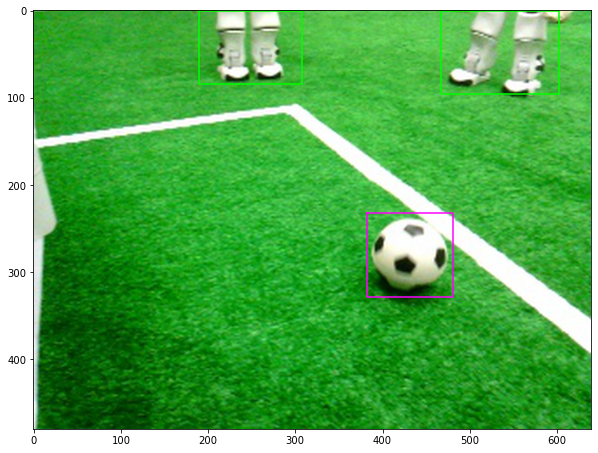

/home/rvg77/data/envs/robots/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/home/rvg77/data/envs/robots/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


[[242.         138.         323.         216.           0.69765258
    0.97197253   0.        ]]


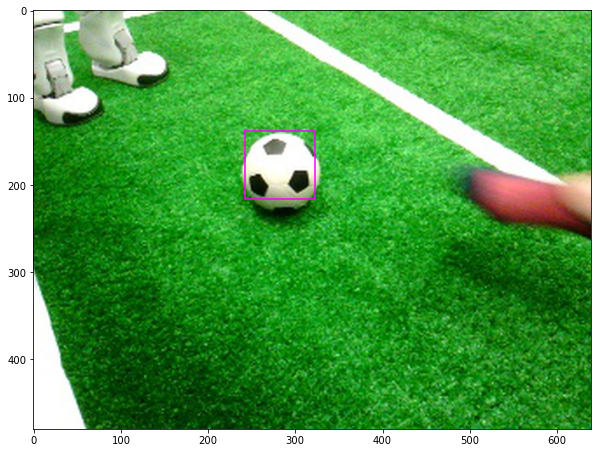

In [209]:
for image_path in tqdm(image_paths):
    path = prefix + image_path
    process_image(path)